# Final Project
### Telco Customer Churn

This project focuses on customer churn data from telecommunication companies and employs data science models to predict and gain valuable business insights into the causes of customer churn in these companies. <br><br>
Data Set: https://www.kaggle.com/datasets/reyhanarighy/data-telco-customer-churn/data


### Collaborators: 
Amhed Cabrera<br>
Aidyn Kitrell<br>
Beau Gregory<br>
Nia Snow

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data_telco_customer_churn.csv")
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


## Data Quality Report:


### Categorical Variables:

In [2]:
# Making a copy of the data but removing continuous variables:
cont_vars = ['tenure', 'MonthlyCharges']  
cat_df = df.drop(columns=cont_vars).copy()

# Get total rows for missing percent.
total_rows = len(cat_df)

# Getting % missing for each feature in the data.
missing_percentages = ((cat_df.isna().sum()) / total_rows) * 100

# Cardinality of each feature
card = cat_df.nunique()

# 1st and 2nd mode, mode frequency, and mode percentage.
modes = cat_df.apply(lambda x: x.value_counts().index[:2].tolist())
mode_frequencies = cat_df.apply(lambda x: x.value_counts().iloc[:2].tolist())
mode_percentages = mode_frequencies.apply(lambda x: [freq / len(cat_df) * 100 for freq in x])

# Create DataFrames for mode and second mode information
mode_df = pd.DataFrame({
    'Mode': modes.apply(lambda x: x[0] if len(x) > 0 else None),
    'Mode Frequency': mode_frequencies.apply(lambda x: x[0] if len(x) > 0 else None),
    'Mode Percentage': mode_percentages.apply(lambda x: f'{x[0]:.2f}%' if len(x) > 0 else None)
})

second_mode_df = pd.DataFrame({
    'Second Mode': modes.apply(lambda x: x[1] if len(x) > 1 else None),
    'Second Mode Frequency': mode_frequencies.apply(lambda x: x[1] if len(x) > 1 else None),
    'Second Mode Percentage': mode_percentages.apply(lambda x: f'{x[1]:.2f}%' if len(x) > 1 else None)
})


cat_qr = pd.DataFrame({'Missing Percentage': missing_percentages.apply(lambda x: f'{x}%'), 'Cardinality': card})
cat_qr = pd.concat([cat_qr, mode_df, second_mode_df], axis=1)

print("Categorical Data Quality Report:")
cat_qr.head(10)

Categorical Data Quality Report:


,Missing Percentage,Cardinality,Mode,Mode Frequency,Mode Percentage,Second Mode,Second Mode Frequency,Second Mode Percentage
Dependents,0.0%,2,No,3446,69.90%,Yes,1484,30.10%
OnlineSecurity,0.0%,3,No,2445,49.59%,Yes,1433,29.07%
OnlineBackup,0.0%,3,No,2172,44.06%,Yes,1706,34.60%
InternetService,0.0%,3,Fiber optic,2172,44.06%,DSL,1706,34.60%
DeviceProtection,0.0%,3,No,2186,44.34%,Yes,1692,34.32%
TechSupport,0.0%,3,No,2467,50.04%,Yes,1411,28.62%
Contract,0.0%,3,Month-to-month,2721,55.19%,Two year,1157,23.47%
PaperlessBilling,0.0%,2,Yes,2957,59.98%,No,1973,40.02%
Churn,0.0%,2,No,3614,73.31%,Yes,1316,26.69%


### Continuous Variables:

In [3]:
# Making a copy of the data but removing categorical variables: 
cont_df = df[['tenure', 'MonthlyCharges']].copy()

# Get total rows for missing percent.
total_rows = len(cont_df)

# Getting % missing for each feature in the data.
missing_percentages = ((cont_df.isna().sum()) / total_rows) * 100

# Cardinality of each feature
card = cont_df.nunique()


summary = cont_df.describe()

# Get Min, 1st Qrt, Mean, Median, 3rd Qrt, and Max specifically.

summary_stats = summary.loc[['min', '25%', 'mean', '50%', '75%', 'max']]

# Transpose the DataFrame for better visualization
summary_stats = summary_stats.transpose()

# (Renaming)
summary_stats.columns = ['Min', '1st Qrt.', 'Mean', 'Median', '3rd Qrt.', 'Max']
summary_stats = summary_stats.applymap(lambda x: f'{x:.2f}')
std_dev = cont_df.std(axis=0)

# Create a DataFrame for missing percentages and cardinality
cont_qr = pd.DataFrame({'Missing Percentage': missing_percentages.apply(lambda x: f'{x}%'),'Cardinality': card})

# Concatenate summary statistics with missing percentages and cardinality
cont_qr = pd.concat([cont_qr, summary_stats], axis=1)
cont_qr['Std. Dev.'] = std_dev.apply(lambda x: f'{x:.3f}')

print("Continuous Data Quality Report:")
cont_qr.head()


Continuous Data Quality Report:


,Missing Percentage,Cardinality,Min,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
tenure,0.0%,73,0.00,9.00,32.40,29.00,55.00,72.00,24.501
MonthlyCharges,0.0%,1422,18.80,37.05,64.88,70.35,89.85,118.65,29.924


### Bar Plots of Categorical Variables

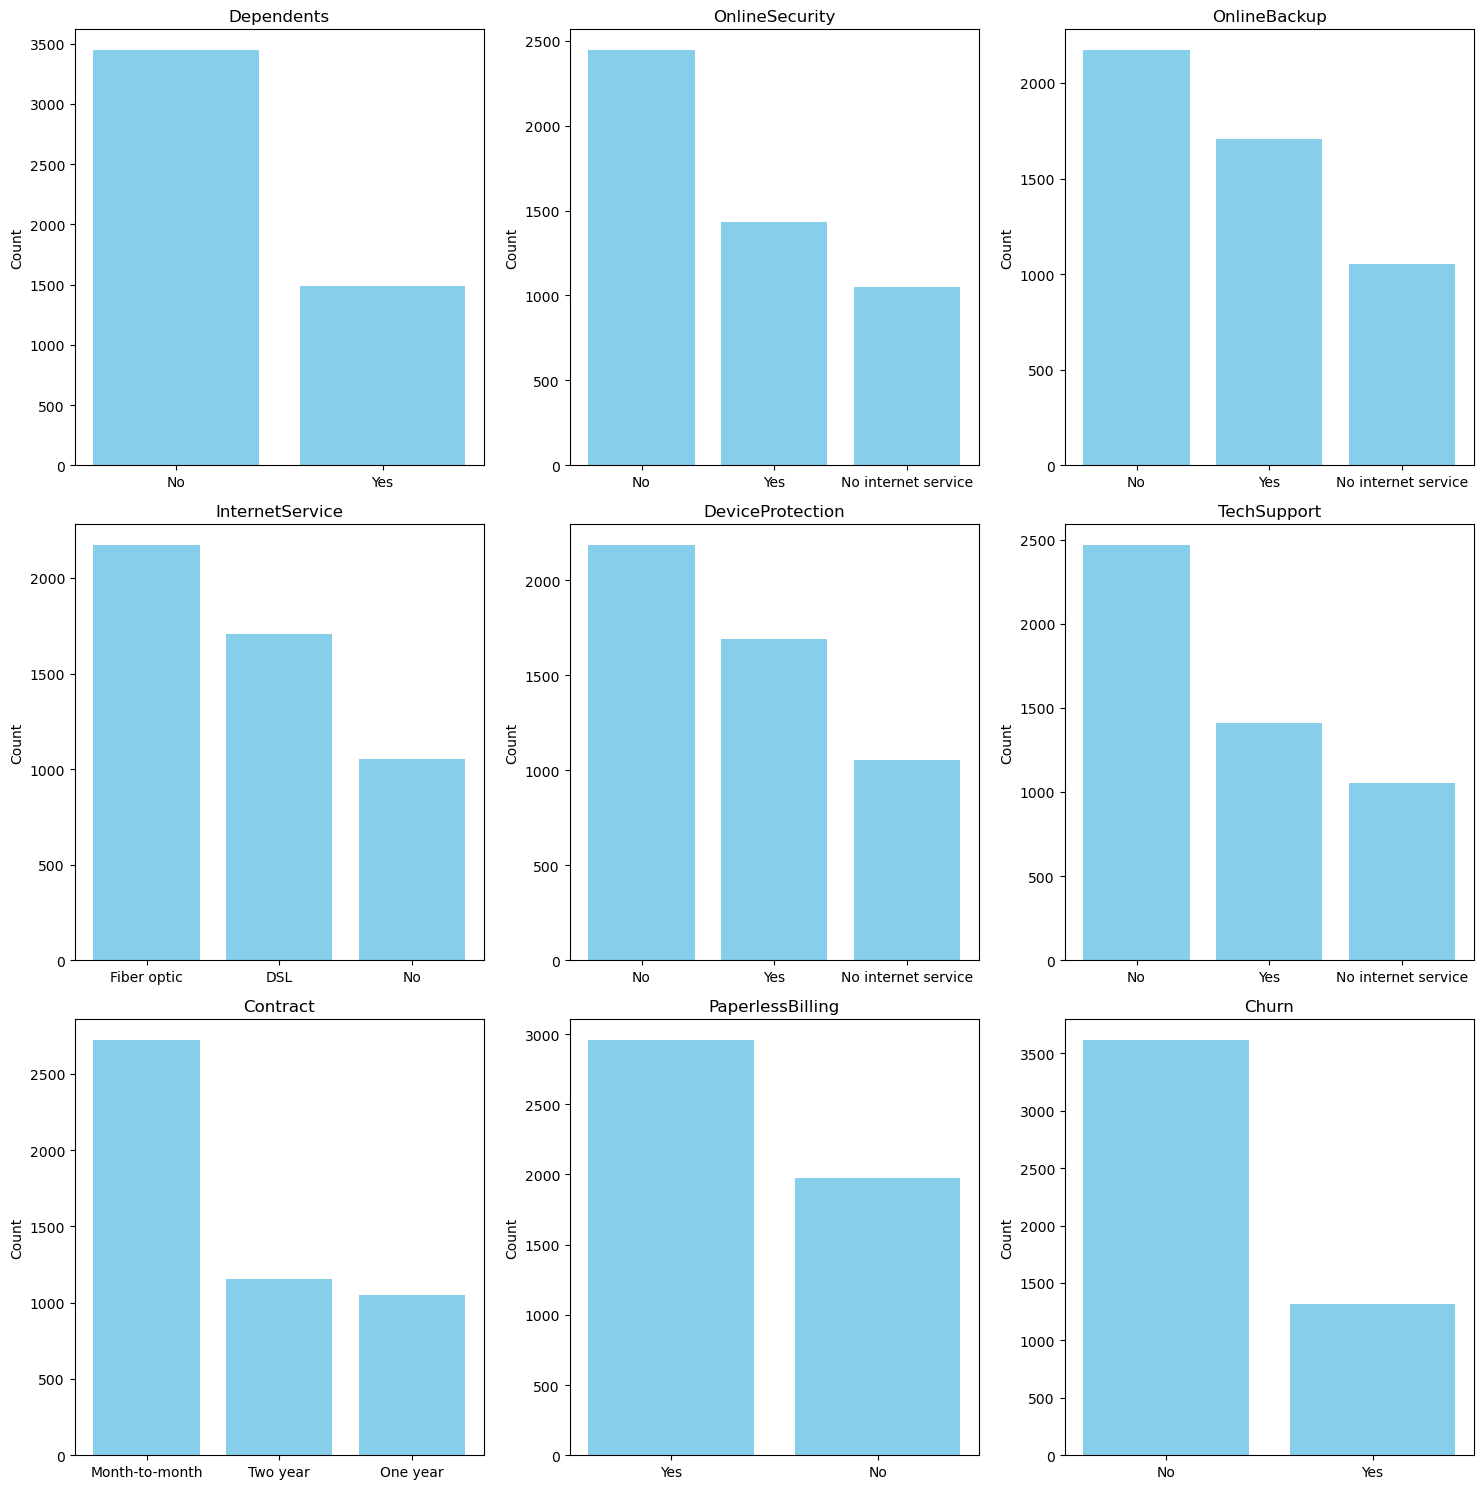

In [4]:
# Getting the number of columns and calculating rows needed
num_cols = cat_df.select_dtypes(include='object').shape[1]
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))  # Create subplots

for i, column in enumerate(df.select_dtypes(include='object').columns):
    row = i // 3  # Calculate row index
    col = i % 3   # Calculate column index
    
    value_counts = df[column].value_counts()
    
    axes[row, col].bar(value_counts.index, value_counts.values, color='skyblue')
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_ylabel('Count')
    axes[row, col].tick_params(axis='x', rotation=0)  # Optional: Rotate x labels for better readability

# Hide empty subplots if there are any
for i in range(num_cols, num_rows * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()  # Adjust layout
plt.show()

### Histograms of Continuous Variables

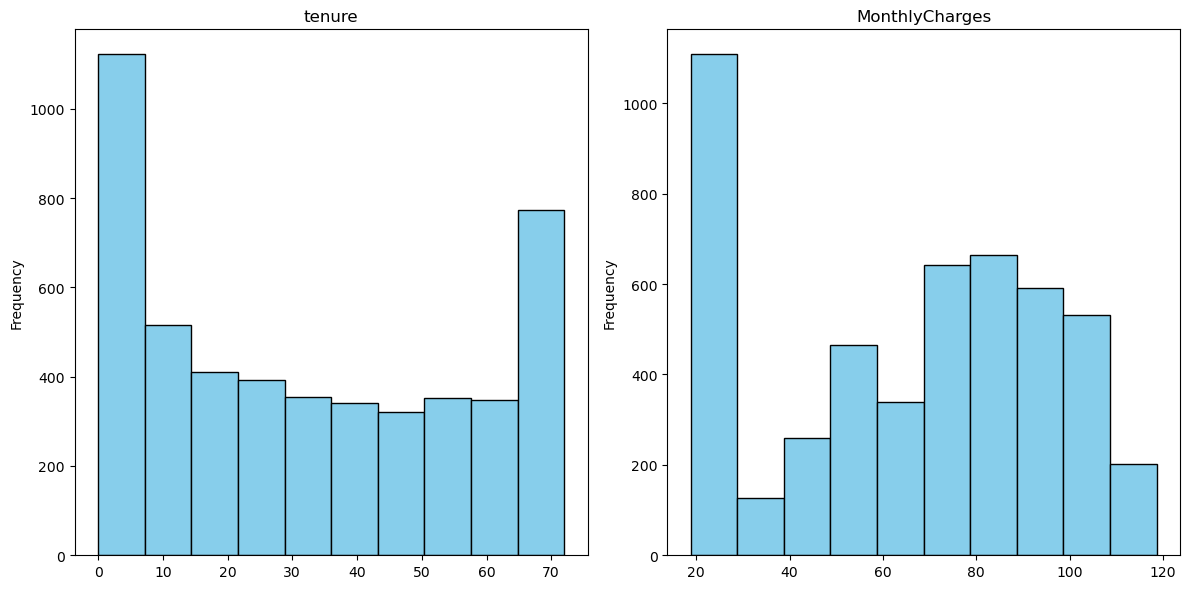

In [5]:
def contPlot(cont_df):
    num_cols_cont = cont_df.select_dtypes(include='number').shape[1]
    # Creating subplots with two columns
    fig, axes = plt.subplots(1, num_cols_cont, figsize=(12, 6))  # Create subplots

    for i, column in enumerate(cont_df.select_dtypes(include='number').columns):
        axes[i].hist(cont_df[column], color='skyblue', bins=10, edgecolor='black')  # Adjust the number of bins as needed
        
        # Set individual x-labels based on column names
        if column == 'Tenure':
            axes[i].set_xlabel('Years')
        elif column == 'Monthly Charges':
            axes[i].set_xlabel('Dollars')
        
        axes[i].set_title(f'{column}')
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()  # Adjust layout
    plt.show()

    
contPlot(cont_df)

### Missing Values and Outliers:

Since, as shown in the data quality reports, there are no missing value in the data, only outliers need to be checked for and or replaced.

In [6]:
# Calculate the IQR for each feature in cont_df
length = len(cont_df)
Q1 = cont_df.quantile(0.25)
Q3 = cont_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers in cont_df
outliers1 = ((cont_df < (Q1 - 1.5 * IQR)) | (cont_df > (Q3 + 1.5 * IQR))).sum()['tenure']
outliers2 = ((cont_df < (Q1 - 1.5 * IQR)) | (cont_df > (Q3 + 1.5 * IQR))).sum()['MonthlyCharges']

# Remove outliers from cont_df and df simultaneously
cont_df = cont_df[~((cont_df < (Q1 - 1.5 * IQR)) | (cont_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df.iloc[cont_df.index]

# Count the number of data points removed
num_removed = length - len(cont_df)

# Print the count of outliers and number of removed data points
print(f'Outliers in feature 1: {outliers1}')
print(f'Outliers in feature 2: {outliers2}')
print(f'Number of data points removed: {num_removed}')

Outliers in feature 1: 0
Outliers in feature 2: 0
Number of data points removed: 0


There are no outliers within the continuous data according to IQR analysis, thus we maintain all of our data points.

### Min Max Normalization:

Normalizing the continuous data frame and the original data frame.

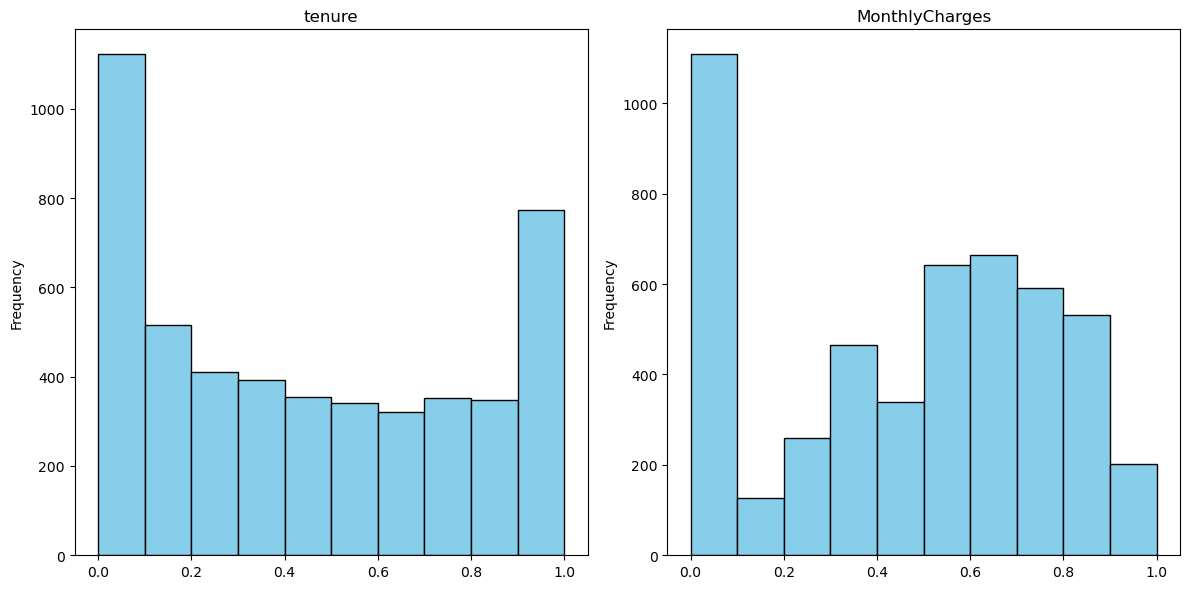

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cont_df[['tenure', 'MonthlyCharges']] = scaler.fit_transform(cont_df[['tenure', 'MonthlyCharges']])
df[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])

contPlot(cont_df)

### Transformations:

The categorical features are transformed into continuous features through numerical encoding. This allows the dataset to be run through models like Random Forest and Logistic Regression.

In [8]:
# feature encoding

df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

ordinal_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for col in ordinal_columns:
    df[col] = df[col].map({'No': 0, 'No internet service': 0, 'Yes': 1})
    
df['InternetService'] = df['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df['Contract'] = df['Contract'].map({'Month-to-month': 1, 'One year': 2, 'Two year': 3})

df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,1,0.125000,0,0,1,1,1,1,1,0.541813,1
1,0,0.194444,0,1,2,1,0,1,1,0.639459,0
2,0,0.888889,1,0,1,1,1,3,0,0.290936,1
3,0,1.000000,1,1,1,1,1,3,0,0.509264,0
4,0,0.041667,0,0,0,0,0,1,1,0.048072,0
...,...,...,...,...,...,...,...,...,...,...,...
4925,0,0.208333,0,0,2,1,1,1,1,0.847772,0
4926,1,0.138889,0,0,2,1,1,1,1,0.724086,0
4927,0,0.805556,0,0,0,0,0,3,0,0.019529,0
4928,0,0.013889,0,0,2,0,0,1,1,0.510265,1


An interaction term created between a customer's tenure and monthly charges can show the total amount the customer has paid.

In [9]:
# creating interaction terms

df['TotalCharged'] = df['tenure'] * df['MonthlyCharges']

df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,TotalCharged
0,1,0.125000,0,0,1,1,1,1,1,0.541813,1,0.067727
1,0,0.194444,0,1,2,1,0,1,1,0.639459,0,0.124339
2,0,0.888889,1,0,1,1,1,3,0,0.290936,1,0.258610
3,0,1.000000,1,1,1,1,1,3,0,0.509264,0,0.509264
4,0,0.041667,0,0,0,0,0,1,1,0.048072,0,0.002003
...,...,...,...,...,...,...,...,...,...,...,...,...
4925,0,0.208333,0,0,2,1,1,1,1,0.847772,0,0.176619
4926,1,0.138889,0,0,2,1,1,1,1,0.724086,0,0.100568
4927,0,0.805556,0,0,0,0,0,3,0,0.019529,0,0.015732
4928,0,0.013889,0,0,2,0,0,1,1,0.510265,1,0.007087


### Feature Selection:

In [10]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Print or visualize the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  Dependents    tenure  OnlineSecurity  OnlineBackup  \
Dependents          1.000000  0.154827        0.092174      0.026465   
tenure              0.154827  1.000000        0.322490      0.361403   
OnlineSecurity      0.092174  0.322490        1.000000      0.279948   
OnlineBackup        0.026465  0.361403        0.279948      1.000000   
InternetService    -0.174998  0.026506        0.152788      0.298012   
DeviceProtection    0.018334  0.355912        0.270211      0.312979   
TechSupport         0.073640  0.327601        0.346772      0.293138   
Contract            0.243351  0.671364        0.243577      0.159191   
PaperlessBilling   -0.109301  0.005435       -0.015053      0.121621   
MonthlyCharges     -0.111378  0.240244        0.290412      0.435382   
Churn              -0.171076 -0.362734       -0.172199     -0.102555   
TotalCharged        0.033980  0.742431        0.406551      0.519008   

                  InternetService  DevicePr

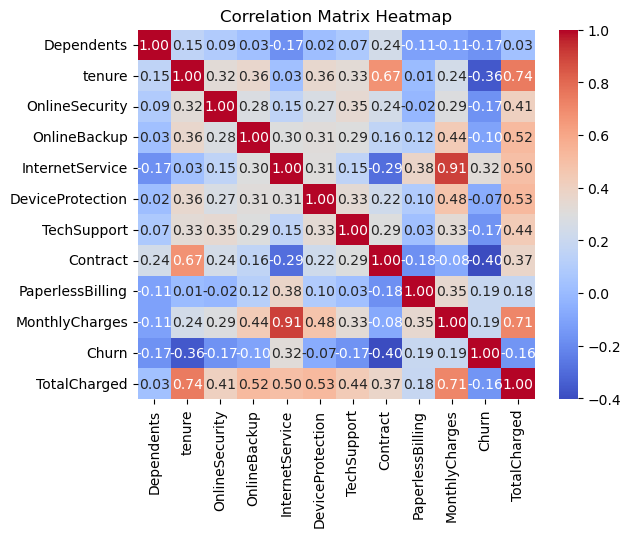

In [11]:
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

The Dependents feature doesn't show that it provides significant information to the target feature, Churn.

In [12]:
feature_to_remove = 'Dependents'

# Check if the feature exists in the DataFrame
if feature_to_remove in df.columns:
    # Remove the feature using the drop method
    df = df.drop(columns=[feature_to_remove])
    print(f"The feature '{feature_to_remove}' has been removed.")
else:
    print(f"The feature '{feature_to_remove}' does not exist in the DataFrame.")

The feature 'Dependents' has been removed.


In [13]:
df

,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,TotalCharged
0,0.125000,0,0,1,1,1,1,1,0.541813,1,0.067727
1,0.194444,0,1,2,1,0,1,1,0.639459,0,0.124339
2,0.888889,1,0,1,1,1,3,0,0.290936,1,0.258610
3,1.000000,1,1,1,1,1,3,0,0.509264,0,0.509264
4,0.041667,0,0,0,0,0,1,1,0.048072,0,0.002003
...,...,...,...,...,...,...,...,...,...,...,...
4925,0.208333,0,0,2,1,1,1,1,0.847772,0,0.176619
4926,0.138889,0,0,2,1,1,1,1,0.724086,0,0.100568
4927,0.805556,0,0,0,0,0,3,0,0.019529,0,0.015732
4928,0.013889,0,0,2,0,0,1,1,0.510265,1,0.007087


### Evaluation Metrics:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

# Assuming X contains your features and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7931
Confusion Matrix:
 [[631  75]
 [129 151]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       706
           1       0.67      0.54      0.60       280

    accuracy                           0.79       986
   macro avg       0.75      0.72      0.73       986
weighted avg       0.78      0.79      0.79       986



In [15]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=22)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7647
Confusion Matrix:
 [[628  78]
 [154 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       706
           1       0.62      0.45      0.52       280

    accuracy                           0.76       986
   macro avg       0.71      0.67      0.68       986
weighted avg       0.75      0.76      0.75       986



The Logistic Regression model has a greater accuracy.